In [358]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [359]:
xls = pd.ExcelFile("KPMG_VI_New_raw_data_update_final (1).xlsx", engine="openpyxl")

In [360]:
transactions = pd.read_excel(xls, "Transactions", skiprows=[0])
NewCustomerList = pd.read_excel(xls, "NewCustomerList", skiprows=[0])
CustomerDemographic = pd.read_excel(xls, "CustomerDemographic", skiprows=[0])
CustomerAddress = pd.read_excel(xls, "CustomerAddress", skiprows=[0])

C:\Users\OVIER~1.IBO\AppData\Local\Temp/ipykernel_7508/2187614826.py:2: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  NewCustomerList = pd.read_excel(xls, "NewCustomerList", skiprows=[0])
C:\Users\OVIER~1.IBO\AppData\Local\Temp/ipykernel_7508/2187614826.py:3: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  CustomerDemographic = pd.read_excel(xls, "CustomerDemographic", skiprows=[0])


In [361]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [ ]:
NewCustomerList.info()

In [117]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
CustomerAddress.info()

In [119]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
CustomerDemographic.info()

In [362]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [ ]:
transactions.info()

In [365]:
#changing the data type of the IDs to strings
transactions[["product_id","customer_id","transaction_id"]]= transactions[["product_id","customer_id","transaction_id"]].astype("object") 

In [366]:
transactions.describe()

,online_order,list_price,standard_cost,product_first_sold_date
count,19640.000000,20000.000000,19803.000000,19803.000000
mean,0.500458,1107.829449,556.046951,38199.776549
std,0.500013,582.825242,405.955660,2875.201110
min,0.000000,12.010000,7.210000,33259.000000
25%,0.000000,575.270000,215.140000,35667.000000
50%,1.000000,1163.890000,507.580000,38216.000000
75%,1.000000,1635.300000,795.100000,40672.000000
max,1.000000,2091.470000,1759.850000,42710.000000


In [367]:
transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

In [368]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [369]:
# deleting the records that have missing values for brand.
# it was observed that those records also have misssing values for product line. product class, product size, standard cost, 
# and product date first sold
transactions = transactions[transactions["brand"].notna()] 
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  object        
 1   product_id               19803 non-null  object        
 2   customer_id              19803 non-null  object        
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
# Replacing the missing values for the online order with the mode of the onkine order
#transactions["online_order"] = transactions["online_order"].astype("object")
online_order_mode = transactions["online_order"].mode()[0]
transactions["online_order"] = transactions["online_order"].fillna(value = online_order_mode)
#transactions["online_order"] = transactions["online_order"].astype("int")

In [ ]:
# replacing the mising values for brand, product class, product line, and product size if there are any
brand_mode = transactions["brand"].mode()[0]
transactions["brand"] = transactions["brand"].fillna(value = brand_mode)

product_class_mode = transactions["product_class"].mode()[0]
transactions["product_class"] = transactions["product_class"].fillna(value = product_class_mode)

product_line_mode = transactions["product_line"].mode()[0]
transactions["product_line"] = transactions["product_line"].fillna(value = product_line_mode)

product_size_mode = transactions["product_size"].mode()[0]
transactions["product_size"] = transactions["product_size"].fillna(value = product_size_mode)

In [375]:
# checking if there are still null values
transactions.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [376]:
transactions.nunique()

transaction_id             19803
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

In [378]:
# deleting duplicate record(transactions) if there are any
transactions = transactions.drop_duplicates()


## NULL VALUES TRANSACTION TABLE
 - TRANSANCTIONS
  - ONLINE ORDER 360
  - BRAND 197
  - PRODUCT LINE 197
  - PRODUCT CLASS 197
  - PRODUCT SIZE 197
  - STANDARD COST 197
  - PRODUCT FIRST SOLD 197
     -   THEY ALL HAVE SAME NUMBER OF MISSING VALUES EXECPT THE "ONLINE ORDER"
 
 
I deleted the transanctions that do not have a brand, product line, product class, product size, standard cost and product first sold. I replaced the missing values in the on;ine order column with the mode of the the column.

## DUPLICATE ROWS

 - NON AVAILABLE
 
BUT TO ENSURE THERE WAS NO DUPLICATE VALUES I DROPPED THE DUPLICATED ROWS

## WRONG FORMAT

 - CHANGED THE DATA FORMAT FOR THE PRODUCT ID, CUSTOMER ID, AND TRANSANCTION ID TO STRINGS


In [379]:
# EXPLORATORY DATA ANALYSIS
correlation = transactions.corr()

<AxesSubplot:>

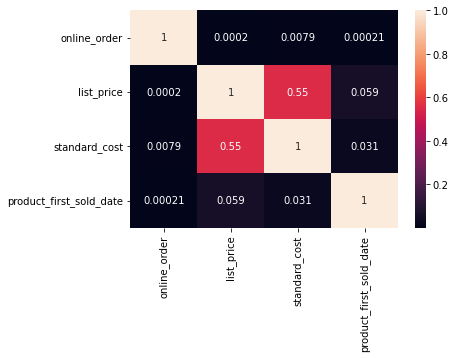

In [380]:
sns.heatmap(correlation, xticklabels = correlation.columns,yticklabels = correlation.columns,annot=True)

# IT CAN BE SEEN THERE ARE NO CORRELATION BETWEEN THESE VARIABLES

In [381]:
# FILTERED THE DATA TO SHOW ON THE NUMERICA VALUES
ax = transactions[["list_price", "standard_cost", "product_first_sold_date"]]

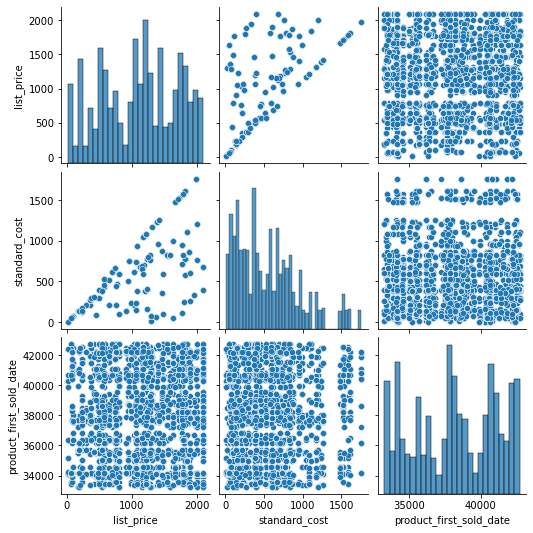

In [144]:
sns.pairplot(ax)

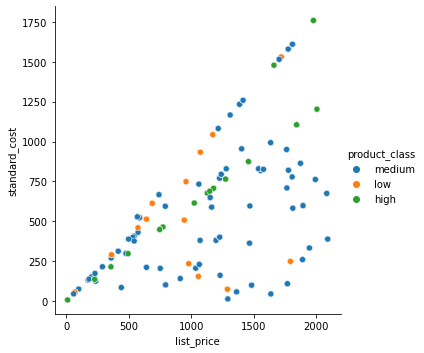

In [382]:
sns.relplot(x = "list_price", y="standard_cost", hue = "product_class", data = transactions)


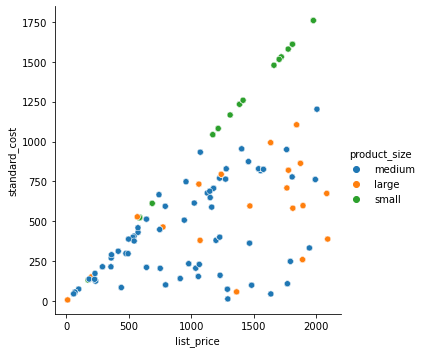

In [383]:
sns.relplot(x = "list_price", y="standard_cost", hue = "product_size", data = transactions)

In [384]:
# CHECKING FOR NULL VALUES
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [385]:
# DROPPING THE DEFAULT COLUMNS AS IT IS NOT USEFULL
CustomerDemographic = CustomerDemographic.drop(["default"], axis = 1)

In [386]:
# DELETING DUPLICATE TRANSANCTION IDS IF ANY
CustomerDemographic = CustomerDemographic.drop_duplicates(subset = "customer_id")


In [387]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [388]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [389]:
# DELETING THE DECEASED INDICTOR COLUMN
CustomerDemographic = CustomerDemographic.drop(["deceased_indicator"], axis = 1)

In [409]:
CustomerDemographic = CustomerDemographic[CustomerDemographic["DOB"] != "1843-12-21"]

In [410]:
CustomerDemographic.describe(include = "all")

C:\Users\OVIER~1.IBO\AppData\Local\Temp/ipykernel_7508/270801537.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  CustomerDemographic.describe(include = "all")


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
count,3999.000000,3999,3874,3999,3999.000000,3912,3493,3999,3999,3999,3912.000000
unique,NaN,3138,3724,3,NaN,3447,195,9,3,2,NaN
top,NaN,Max,Ramsdell,F,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,Yes,NaN
freq,NaN,5,3,2039,NaN,7,45,1455,2000,2024,NaN
first,NaN,NaN,NaN,NaN,NaN,1931-10-23 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,2000.991748,NaN,NaN,NaN,48.887472,NaN,NaN,NaN,NaN,NaN,10.654652
std,1154.570372,NaN,NaN,NaN,28.718151,NaN,NaN,NaN,NaN,NaN,5.658898
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1001.500000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,6.000000


In [411]:
CustomerDemographic.nunique()

customer_id                            3999
first_name                             3138
last_name                              3724
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3447
job_title                               195
job_industry_category                     9
wealth_segment                            3
owns_car                                  2
tenure                                   22
dtype: int64

In [412]:
CustomerDemographic["tenure"].unique() # noticed missing values for the age

array([11., 16., 15.,  7.,  8., 13., 20.,  9.,  6.,  1., 18., 21., 12.,
       19., 14.,  4., 22.,  5., 17.,  2.,  3., 10., nan])

In [413]:
# standarddized the data and ensure the genders were represented in a consistent format
CustomerDemographic["gender"] = [str(x)[0] for x in CustomerDemographic["gender"]] 

In [414]:
# replaced the nan with mode of the job_industry_category column
job_industry_category_mode = CustomerDemographic["job_industry_category"].mode()[0]
CustomerDemographic["job_industry_category"] = CustomerDemographic["job_industry_category"].fillna(value=job_industry_category_mode) 

In [415]:
# replaced the nan with mode of the job title column
job_title_mode = CustomerDemographic["job_title"].mode()
CustomerDemographic["job_title"] = CustomerDemographic["job_title"].fillna(value=job_title_mode) 

In [416]:
# replaced the nan with mode of the DOB colum
DOB_mode = CustomerDemographic["DOB"].mode()[0]
CustomerDemographic["DOB"] = CustomerDemographic["DOB"].fillna(value=DOB_mode) 

In [417]:
# replaced the nan with mean of the tenure column
tenure_mean = CustomerDemographic["tenure"].mean()
CustomerDemographic["tenure"] = CustomerDemographic["tenure"].fillna(value=tenure_mean) 

In [418]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,Yes,8.0


## NULL VALUES
 - THE LAST NAME 125 
 - DOB 87
 - JOB TITLE 506
 - JOB INDUSTRY 656 
 - TENURE 87
 Replaced the null values with mean and mode 
 
## IRRELEVANT AND UNSABLE FORMAT
 - THE DEFAULT COLUMN CONTAINS INVALID DATA
 - DECEASED INDICATORS 
 
 ## OUTLIERS
  - DOB 1 1843

## DUPLICATES

 - No dubliocates where observed. But to be sure, I deleted the duplicates in the table if any
 
## INCONSISTENT FORMAT
 - The gender column had incosistent format of representing male and female
 

In [ ]:
NewCustomerList.info()

In [419]:
# dropped the unnamed columns which would not be of use
NewCustomerList = NewCustomerList.loc[:,~NewCustomerList.columns.str.contains('^Unnamed')] 

In [420]:
# checking for nulls 
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [421]:
 #replaced the missing values of the job title
job_title_mode = NewCustomerList["job_title"].mode()[0]
NewCustomerList["job_title"] = NewCustomerList["job_title"].fillna(value=job_title_mode)

C:\Users\OVIER~1.IBO\AppData\Local\Temp/ipykernel_7508/622879950.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList["job_title"] = NewCustomerList["job_title"].fillna(value=job_title_mode)


In [422]:
#replaced the missing values of the job_industry_category
job_industry_category_mode = NewCustomerList["job_industry_category"].mode()[0]
NewCustomerList["job_industry_category"] = NewCustomerList["job_industry_category"].fillna(value=job_industry_category_mode)


C:\Users\OVIER~1.IBO\AppData\Local\Temp/ipykernel_7508/2878433879.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList["job_industry_category"] = NewCustomerList["job_industry_category"].fillna(value=job_industry_category_mode)


In [427]:
NewCustomerList.isnull().sum()

first_name                              0
last_name                              29
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
dtype: int64

In [428]:
NewCustomerList["gender"].unique()

array(['M', 'F', 'U'], dtype=object)

In [425]:
 # replaced the Genders with a fromat that is consistent with the other tables
NewCustomerList["gender"] = [x[0] for x in NewCustomerList["gender"]]

C:\Users\OVIER~1.IBO\AppData\Local\Temp/ipykernel_7508/3535633070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NewCustomerList["gender"] = [x[0] for x in NewCustomerList["gender"]]


In [429]:
 #dropped the deceased column since they are all "N" and its not relevant to the data
NewCustomerList = NewCustomerList.drop(["deceased_indicator"], axis = 1)

## MISSING VALUES
 - JOB TITLE
 - JOB INDUSTRY
 
## UNWANTED COLUMNS
 - DROPPED THE UNMAME COLUMNS
 - DROPPED THE DECEASED COLUMN
## INCONSISTENT FORMAT
 - CHANGED THE REPRESENTATION OF THE GENDER TO BE CONSISTENT WITH THAT OF THE PREVIOUS TABLES

In [430]:
correlation = NewCustomerList.corr()

<AxesSubplot:>

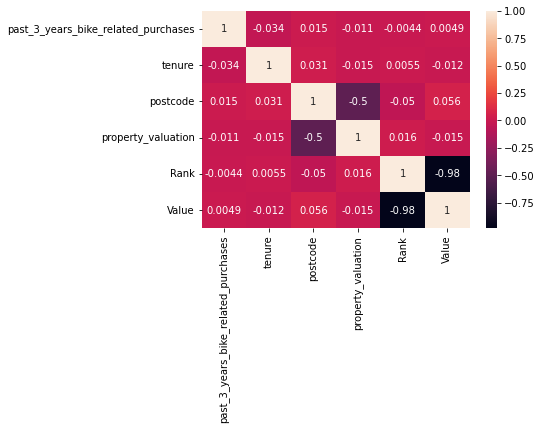

In [431]:
sns.heatmap(correlation, xticklabels = correlation.columns,yticklabels = correlation.columns,annot=True)

# A STRONG NEGATIVE CORRELATION EXIST BETWEEN VALUE AND RANK

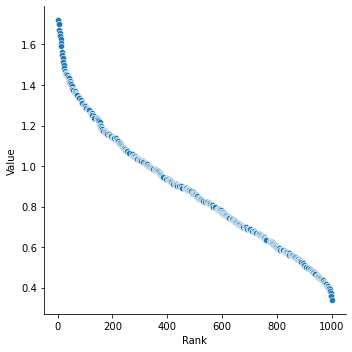

In [432]:
sns.relplot(x = "Rank", y="Value", data = NewCustomerList)

In [433]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [434]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0
2,3,Arlin,Dearle,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,Yes,15.0
3,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,No,7.0
4,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,Yes,8.0


In [435]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [436]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
0,Chickie,Brister,M,86,1957-07-12,General Manager,Manufacturing,Mass Customer,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,M,69,1970-03-22,Structural Engineer,Property,Mass Customer,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,F,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,F,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,F,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [437]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [439]:
#The STATE COLUMN is inconsistent
CustomerAddress["state"].unique()

array(['New South Wales', 'QLD', 'VIC', 'NSW', 'Victoria'], dtype=object)

In [440]:
# MAKING THE STATE COLUMN CONSISTENT BY REPRESENTING THE STATES WITH 3 CHARACTERS
CustomerAddress["state"] = CustomerAddress["state"].replace("New South Wales", "NSW") 

In [441]:
CustomerAddress["state"] = CustomerAddress["state"].replace("Victoria", "VIC")

In [443]:
# CHANGING THE DATA TYPE FROM INTERGER TO STRING
CustomerAddress["customer_id"] = CustomerAddress["customer_id"].astype("object")

In [444]:
CustomerAddress.describe(include = "all")

,customer_id,address,postcode,state,country,property_valuation
count,3999.0,3999,3999.000000,3999,3999,3999.000000
unique,3999.0,3996,NaN,3,1,NaN
top,1.0,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,1.0,2,NaN,2140,3999,NaN
mean,NaN,NaN,2985.755939,NaN,NaN,7.514379
std,NaN,NaN,844.878364,NaN,NaN,2.824663
min,NaN,NaN,2000.000000,NaN,NaN,1.000000
25%,NaN,NaN,2200.000000,NaN,NaN,6.000000
50%,NaN,NaN,2768.000000,NaN,NaN,8.000000
75%,NaN,NaN,3750.000000,NaN,NaN,10.000000


In [446]:
# NOTICED DUPLICATE ADDRESS IN THE ADDRESS COLUMN
CustomerAddress[CustomerAddress["address"]=="3 Mariners Cove Terrace"]

,customer_id,address,postcode,state,country,property_valuation
2328,2333,3 Mariners Cove Terrace,3108,VIC,Australia,10
2980,2985,3 Mariners Cove Terrace,2216,NSW,Australia,10


In [448]:
CustomerDemographic.nunique()

customer_id                            3999
first_name                             3138
last_name                              3724
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3447
job_title                               195
job_industry_category                     9
wealth_segment                            3
owns_car                                  2
tenure                                   23
dtype: int64

In [449]:
transactions.nunique()

transaction_id             19803
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

In [450]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    3
country                  1
property_valuation      12
dtype: int64

In [451]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   owns_car                             1000 non-null   object        
 9   tenure                               1000 non-null   int64         
 10  address      

In [452]:
# MERGING THE CUSTOMER DEMOGRAPHIC AND CUSTOMER ADDRESS

df = pd.merge(CustomerDemographic,CustomerAddress,on="customer_id")
df.head()



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,Yes,11.0,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,Yes,16.0,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,M,33,1961-10-03,NaN,IT,Mass Customer,No,7.0,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,F,56,1977-05-13,Senior Editor,Manufacturing,Affluent Customer,Yes,8.0,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,M,35,1966-09-16,NaN,Retail,High Net Worth,Yes,13.0,9 Oakridge Court,3216,VIC,Australia,9


In [352]:
df.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\KMPG\KMPG.csv", index = False)

In [457]:
# filled the missing values of the DOB with the most occured DOB
NewCustomerList["DOB"] = NewCustomerList["DOB"].fillna(value= NewCustomerList["DOB"][0])

In [459]:
NewCustomerList.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\KMPG\NewCustomerList.csv", index = False)

In [461]:
transactions.to_csv(r"C:\Users\Ovie R. Iboyitie\CypherCrescent\PROJECTS\KMPG\transactions.csv", index = False)